# Multi-Layer Perceptron with MNIST handwritten digits classification 

## 1. Module Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import datasets
import torchvision.transforms as transforms

## 2. 딥러닝 모델을 설계할 때 활용하는 장비 확인

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', device)

Using PyTorch version: 1.11.0  Device: cpu


## 3. MNIST 데이터 다운로드 (Train data와 Test data 분리하기)

In [3]:
BATCH_SIZE = 32

train_data = datasets.MNIST('./data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST('./data', train=False, download=True, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=False)


## 4. 첫번째 batch 데이터의 크기와 타입을 확인하기

In [4]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


## ReLU, one_hot_encoding, softmax, cross_entropy 구하기

아래 코드는 각 함수가 맞는지 확인하기 위해서 만든 임의의 값입니다. 
각 함수가 작동을 잘하는지 확인해 보세요

In [5]:
test_data = torch.tensor([[1,-2,-4, 2, 5, 6, -3, -5, 0, 2],[2, -3, 4, 3, -1, -4, 3, 5, 2, -3]])
true_label = torch.tensor([5,7])
false_label = torch.tensor([1,0])

In [6]:
torch.eye(10)[[8,5,6,7,8]]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [7]:
def ReLU_func(outputs):
    zero_tensor = torch.zeros(outputs.size())
    final_outputs = torch.maximum(outputs, zero_tensor)

    return final_outputs

ReLU 함수가 맞는지 test_data를 이용하여 맞추어 보자. 아래 함수의 결과는 어떻게 예상되는가?

In [8]:
ReLU_func(test_data)

tensor([[1., 0., 0., 2., 5., 6., 0., 0., 0., 2.],
        [2., 0., 4., 3., 0., 0., 3., 5., 2., 0.]])

In [9]:
def one_hot_encoding(label):
    
    one_hot_outputs = torch.sparse.torch.eye(10)
    one_hot_outputs = one_hot_outputs.index_select(0,label)
    
    return one_hot_outputs

one_hot_encoding 함수가 맞는지 true_label, false_label을 이용하여 맞추어 보자. 아래 함수 결과는 어떻게 예상되는가?

In [10]:
# 검증을 위해 아래 4줄을 사용하면 됩니다. 
tl = one_hot_encoding(true_label)
print(tl)
fl = one_hot_encoding(false_label)
print(fl)

# 나중을 위해서 사용될 코드 입니다. 
close_tl = tl.clone()
close_tl[[0,1],true_label] -= 0.001
close_tl[false_label] += 0.0001
print(close_tl)

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])
tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[1.0000e-04, 1.0000e-04, 1.0000e-04, 1.0000e-04, 1.0000e-04, 9.9910e-01,
         1.0000e-04, 1.0000e-04, 1.0000e-04, 1.0000e-04],
        [1.0000e-04, 1.0000e-04, 1.0000e-04, 1.0000e-04, 1.0000e-04, 1.0000e-04,
         1.0000e-04, 9.9910e-01, 1.0000e-04, 1.0000e-04]])


In [11]:
def softmax(outputs):
    numerator = torch.exp(outputs - torch.max(outputs,axis=1)[0].view(-1,1))
    denominator = torch.sum(numerator, axis=1).view(-1,1)
    softmax = numerator/denominator
    
    return softmax

softmax 함수가 맞는지 test_data를 이용하여 맞추어 보자. 아래 함수의 결과는 어떻게 예상되는가?

In [12]:
a = softmax(test_data)
print(a)
torch.sum(a,axis=1)

tensor([[4.7643e-03, 2.3720e-04, 3.2102e-05, 1.2951e-02, 2.6012e-01, 7.0709e-01,
         8.7262e-05, 1.1810e-05, 1.7527e-03, 1.2951e-02],
        [2.8590e-02, 1.9264e-04, 2.1126e-01, 7.7716e-02, 1.4234e-03, 7.0868e-05,
         7.7716e-02, 5.7425e-01, 2.8590e-02, 1.9264e-04]])


tensor([1., 1.])

In [13]:
def cross_entropy(outputs, labels):
    
    return torch.sum(-1*labels*torch.log(outputs),axis=1)

In [14]:
#a = torch.tensor([0.1,0.1,0.8])
#b = torch.tensor([0.7,0.2,0.1])
#cross_entropy(a, b)

cross_entropy 함수가 맞는지 test_data를 이용하여 맞추어 보자. 아래 함수의 결과는 어떻게 예상되는가? tl, fl, close_tl을 이용하여 각각의 cross entropy를 구하고 그 값이 맞는지 확인하세요 

In [15]:
ideal_result = cross_entropy(close_tl, tl)
non_ideal_result = cross_entropy(close_tl,fl)

print(ideal_result)
print(non_ideal_result)

true_result = cross_entropy(a,tl)
false_result = cross_entropy(a,fl)

print(true_result)
print(false_result)


tensor([0.0009, 0.0009])
tensor([9.2103, 9.2103])
tensor([0.3466, 0.5547])
tensor([8.3466, 3.5547])


# 학습하기
   
   1) input layer (입력층), hidden layer (은닉층), output layer (출력층) 으로 이루어진 모델을 이용

   2) 하나의 hidden layer (은닉층)만 이용 - 은닉층의 개수는 100개로 하세요

   3) 모든 것은 tensor 계산으로만 할 것!! 


In [16]:
def training(train_loader):
    
    learning_rate = 0.01
    
    train_losses_per_epoch = []
    test_losses_per_epoch = []
    log_interval = 500
    
    train_accuracies = []
    test_accuracies = []
    
    # Weight(가중치)를 초기화 (torch rand 함수 이용, 도중에 빼기 0.5를 하여 함수값이 -0.5~0.5 사이로 만드세요)
    W_ih = torch.rand(28*28, 100, dtype = torch.float, requires_grad = True) - 0.5
    W_ho = torch.rand(100, 10, dtype = torch.float, requires_grad = True) - 0.5
    
    for epoch in range(20):
        
        train_losses = []
        test_losses = []
        train_correct = 0
        
        for batch_idx, (image, label) in enumerate(train_loader):

            # 이미지를 (batch_size, 784) 차원의 메트릭스로 만드세요
            image = image.view(-1, 28 * 28)
            
            # Forward propagration 계산하기.
             # 첫번째 Layer의 값
            outputs =  image.matmul(W_ih)

             # 결과 값(outputs)을 ReLU 함수에 적용하기
            outputs = ReLU_func(outputs)

             # 출력 layer 계산하기
            outputs = outputs.matmul(W_ho)

             # softmax 적용하기
            softmaxed_outputs = softmax(outputs)

             # Label을 One_hot 형태로 변환하기
            expected_outputs = one_hot_encoding(label)

             # Cross_entropy 함수를 적용하여 loss를 구하기
            loss = cross_entropy(softmaxed_outputs, expected_outputs)
            
             # training accuracy 정확도 구하기 위해 맞는 샘플 개수 세기
            pred = torch.max(outputs, 1).indices 
                  #softmaxed_outputs.max(1,keepdim=TRUE)[1]
            train_correct += (pred == label).int().sum()
                             #pred.eq(label.view_as(pred)).sum.item()
            
             # 32개의 이미지에 따른 loss를 scalar로 변환 하기
            loss = torch.mean(loss)
                   #loss.mean()
                
            train_losses.append(loss.item())

            
            W_ih.retain_grad()
            W_ho.retain_grad()

            # Gradinet 구하기
            loss.backward()
        
            with torch.no_grad():
                # Gradient Descent 방식 적용
                W_ih=W_ih-learning_rate* W_ih.grad
                W_ho=W_ho-learning_rate* W_ho.grad


            W_ih.requires_grad = True
            W_ho.requires_grad = True

            if batch_idx % log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'
                      .format(epoch, batch_idx * len(label), len(train_loader.dataset),100. * batch_idx / len(train_loader),
                              loss.item()))
        
        average_loss = np.mean(train_losses)
        train_losses_per_epoch.append(average_loss)
        
        train_accuracy = train_correct / len(train_loader.dataset) * 100
        train_accuracies.append(train_accuracy)
        print('\nTraining set: Accuracy: {}/{} ({:.0f}%)'
              .format(train_correct, len(train_loader.dataset),100. * train_correct / len(train_loader.dataset)))

        
        correct = 0
        with torch.no_grad():
            for batch_idx, (image, label) in enumerate(test_loader):
                image = image.view(-1, 28 * 28)

                # Forward propagration 계산하기.
                 # 첫번째 Layer의 값
                outputs = image.matmul(W_ih)

                 # 결과 값(outputs)을 ReLU 함수에 적용하기
                outputs = ReLU_func(outputs)

                 # 출력 layer 계산 하기
                outputs = outputs.matmul(W_ho)
                
                # Cross_entropy 함수를 적용하여 loss를 구하기
                loss = cross_entropy(softmax(outputs), one_hot_encoding(label))

                # 32개의 이미지에 따른 loss를 scalar로 변환 하기
                loss = torch.mean(loss)
                test_losses.append(loss.item())
                 
                # 정확도 구하기
                pred = torch.max(outputs, 1).indices
                      #softmaxed_outputs.max(1,keepdim=TRUE)[1]
                correct += (pred == label).int().sum()
                           #pred.eq(label.view_as(pred)).sum.item(
        
            test_accuracy = 100. * correct / len(test_loader.dataset)
            print('Test set: Accuracy: {}/{} ({:.0f}%)\n'
                  .format(correct, len(test_loader.dataset),100. * correct / len(test_loader.dataset)))
        test_losses_per_epoch.append(np.mean(test_losses))
        test_accuracies.append(test_accuracy)
        
    return train_losses_per_epoch, test_losses_per_epoch, train_accuracies, test_accuracies


In [17]:
train_losses_per_epoch, test_losses_per_epoch, train_accuracies, test_accuracies = training(train_loader)

Train Epoch: 0 [0/60000 (0%)]	Loss: 7.000470
Train Epoch: 0 [16000/60000 (27%)]	Loss: 1.243524
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.692995
Train Epoch: 0 [48000/60000 (80%)]	Loss: 0.346644

Training set: Accuracy: 44879/60000 (75%)
Test set: Accuracy: 50867/60000 (85%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.823657
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.635816
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.516577
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.252429

Training set: Accuracy: 52139/60000 (87%)
Test set: Accuracy: 53035/60000 (88%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.595258
Train Epoch: 2 [16000/60000 (27%)]	Loss: 0.471181
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.448678
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.213541

Training set: Accuracy: 53561/60000 (89%)
Test set: Accuracy: 54030/60000 (90%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.482219
Train Epoch: 3 [16000/60000 (27%)]	Loss: 0.374313
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.416976
Train Epoch: 3 [48000/60

# 학습 결과 보기 
## 1. loss 값 비교

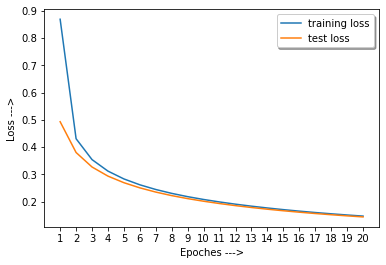

In [18]:
x = np.arange(1,21)
plt.plot(x, train_losses_per_epoch, x, test_losses_per_epoch)
plt.legend(('training loss', 'test loss'), loc='upper right', shadow=True)
plt.xlabel('Epoches --->')
plt.ylabel('Loss --->')
plt.xlim([0,21])
plt.xticks(np.arange(1, 21, step=1))
plt.show()

# 2. 정확도 비교

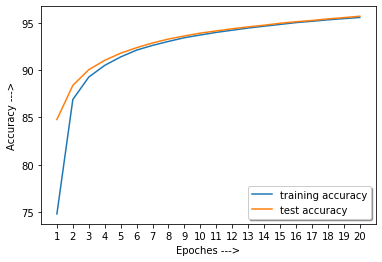

In [19]:
x = np.arange(1,21)
plt.plot(x, train_accuracies, x, test_accuracies)
plt.legend(('training accuracy', 'test accuracy'), loc='lower right', shadow=True)
plt.xlabel('Epoches --->')
plt.ylabel('Accuracy --->')
plt.xlim([0,21])
plt.xticks(np.arange(1, 21, step=1))
plt.show()